In [1]:
import numpy as np
from numpy.lib.stride_tricks import as_strided


def pool2d(arr, kernel_size, stride, padding=0, pool_mode='max'):
    """
    2D Pooling
    Parameters:
        arr: input 2D array
        kernel_size: int, the size of the window over which we take pool
        stride: int, the stride of the window
        padding: int, implicit zero paddings on both sides of the input
        pool_mode: string, 'max' or 'avg'
    """
    # Padding
    arr = np.pad(arr, padding, mode='constant')
    
    print("arr:")
    print("{}".format(arr))

    # Window view of arr
    output_shape = ((arr.shape[0] - kernel_size) // stride + 1,
                    (arr.shape[1] - kernel_size) // stride + 1)
    
    print("output shape: {}".format(output_shape))
    
    shape_w = (output_shape[0], output_shape[1], kernel_size, kernel_size)
    strides_w = (stride*arr.strides[0], stride*arr.strides[1], arr.strides[0], arr.strides[1])
    print("shape_w: {}, strides_w: {}".format(shape_w, strides_w))
    arr_w = as_strided(arr, shape_w, strides_w)
    print("strides_w: {}".format(strides_w))

    # Return the result of pooling
    if pool_mode == 'max':
        return arr_w.max(axis=(2, 3))
    elif pool_mode == 'avg':
        return arr_w.mean(axis=(2, 3))

In [2]:
arr = np.array([[1, 1, 2, 4],
                  [5, 6, 7, 8],
                  [3, 2, 1, 0],
                  [1, 2, 3, 4]])
pool2d(arr, kernel_size=2, stride=2, padding=0, pool_mode='max')

arr:
[[1 1 2 4]
 [5 6 7 8]
 [3 2 1 0]
 [1 2 3 4]]
output shape: (2, 2)
strides_w: (64, 16, 32, 8)
strides_w: (64, 16, 32, 8)


array([[6, 8],
       [3, 4]])

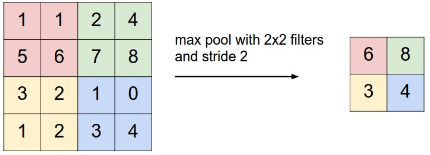